In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = pd.read_csv("Crop_Recommendation.csv")

X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_k = 0
best_score = 0


import pandas as pd
import numpy as np

# Create a DataFrame for X_train and y_train
train_df = pd.DataFrame(X_train, columns=data.drop('label', axis=1).columns)
train_df['label'] = y_train.reset_index(drop=True)

# Create a DataFrame for X_test and y_test
test_df = pd.DataFrame(X_test, columns=data.drop('label', axis=1).columns)
test_df['label'] = y_test.reset_index(drop=True)

# Save the DataFrames to CSV files
np.savetxt('training.csv', train_df.values, delimiter=',', fmt='%s', header=','.join(train_df.columns), comments='')
np.savetxt('testing.csv', test_df.values, delimiter=',', fmt='%s', header=','.join(test_df.columns), comments='')



kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring="accuracy")
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Best k value: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set with k={best_k}: {accuracy:.4f}")


Best k value: 3
Accuracy on test set with k=3: 0.9682


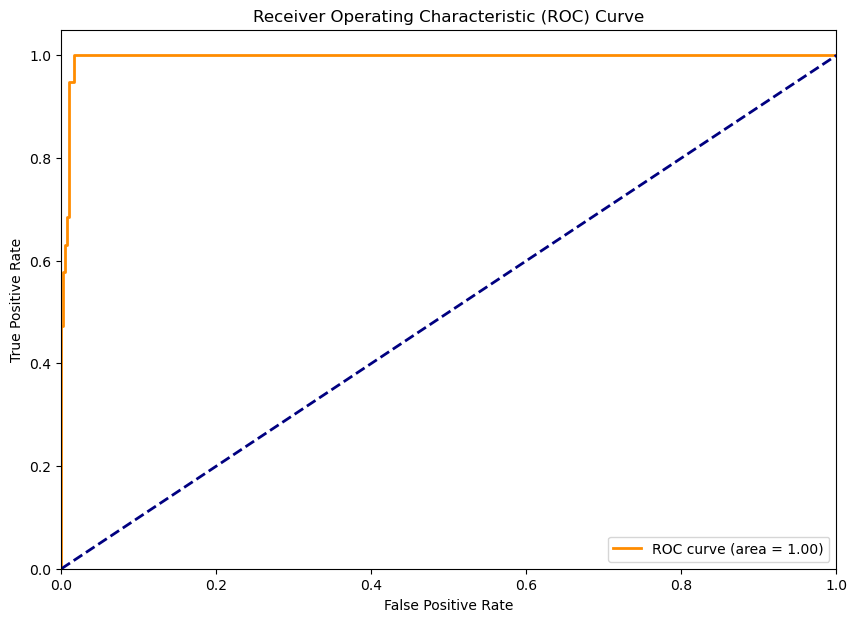

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Convert the problem into a binary classification task: rice vs. non-rice
data['label'] = np.where(data['label'] == 'rice', 'rice', 'non-rice')

# Split the data into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Convert labels to binary: 1 for rice, 0 for non-rice
y = np.where(y == 'rice', 1, 0)

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Get the probability scores
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data from the local file
data = pd.read_csv('SMSSpamCollection', sep="\t", header=None, names=['label', 'message'])

# Convert messages to lowercase
data['message'] = data['message'].str.lower()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Convert text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# SVM classifier
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train_transformed, y_train)
svm_y_pred = svm_clf.predict(X_test_transformed)

# Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_transformed, y_train)
rf_y_pred = rf_clf.predict(X_test_transformed)

# Evaluation
print("SVM Classifier Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred, labels=["ham", "spam"]))

print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred, labels=["ham", "spam"]))


SVM Classifier Accuracy: 0.9901345291479821
SVM Confusion Matrix:
 [[965   1]
 [ 10 139]]

Random Forest Classifier Accuracy: 0.9811659192825112
Random Forest Confusion Matrix:
 [[966   0]
 [ 21 128]]


SVM Classifier Accuracy: 0.9901345291479821
SVM Confusion Matrix:
 [[965   1]
 [ 10 139]]

Random Forest Classifier Accuracy: 0.9811659192825112
Random Forest Confusion Matrix:
 [[966   0]
 [ 21 128]]


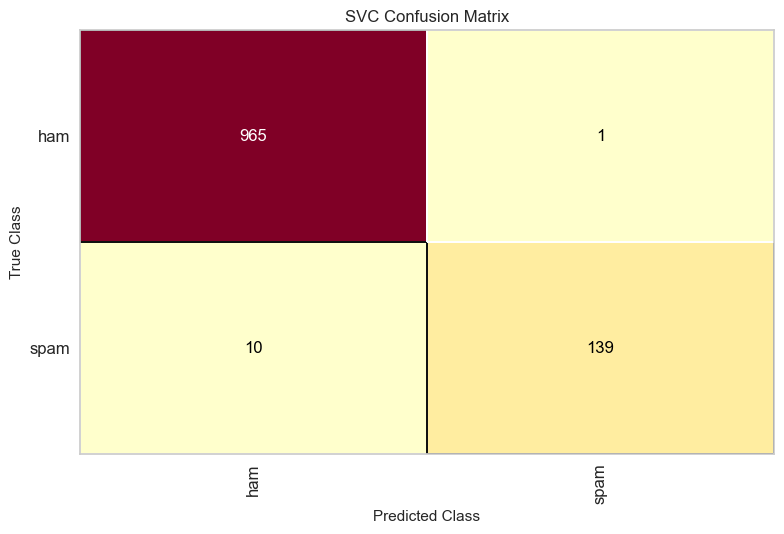

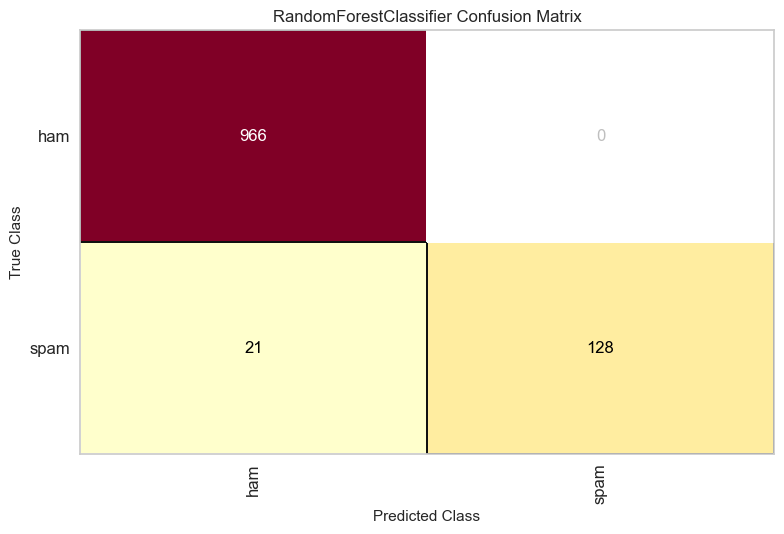

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

# Load data from the local file
data = pd.read_csv('SMSSpamCollection', sep="\t", header=None, names=['label', 'message'])

# Convert messages to lowercase
data['message'] = data['message'].str.lower()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Convert text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# SVM classifier
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train_transformed, y_train)
svm_y_pred = svm_clf.predict(X_test_transformed)

# Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_transformed, y_train)
rf_y_pred = rf_clf.predict(X_test_transformed)

# Evaluation
print("SVM Classifier Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred, labels=["ham", "spam"]))

print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred, labels=["ham", "spam"]))

# Visualization using yellowbrick for SVM
visualizer_svm = ConfusionMatrix(svm_clf, classes=["ham", "spam"])
visualizer_svm.fit(X_train_transformed, y_train)
visualizer_svm.score(X_test_transformed, y_test)
visualizer_svm.poof(title='Confusion Matrix for SVM')

# Visualization using yellowbrick for Random Forest
visualizer_rf = ConfusionMatrix(rf_clf, classes=["ham", "spam"])
visualizer_rf.fit(X_train_transformed, y_train)
visualizer_rf.score(X_test_transformed, y_test)
visualizer_rf.poof(title='Confusion Matrix for Random Forest')


C:\Users\cui10\anaconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


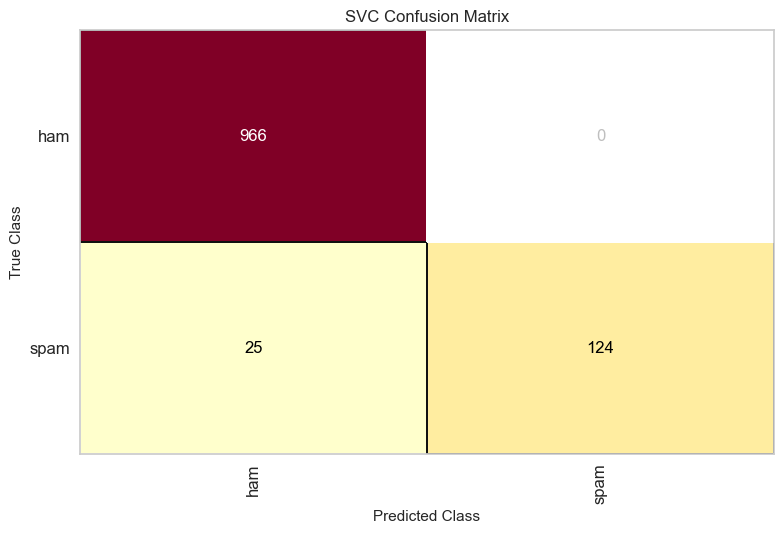

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

# 假设数据已经读入并存储在data变量中
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(data['message'])
y = data['label'].map({"ham": 0, "spam": 1})  # 将标签编码为数字

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练SVM分类器
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# 使用Yellowbrick的ConfusionMatrix
svm_visualizer = ConfusionMatrix(svm_clf, classes=["ham", "spam"])
svm_visualizer.score(X_test, y_test)
svm_visualizer.poof(title='Confusion Matrix for SVM')


C:\Users\cui10\anaconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


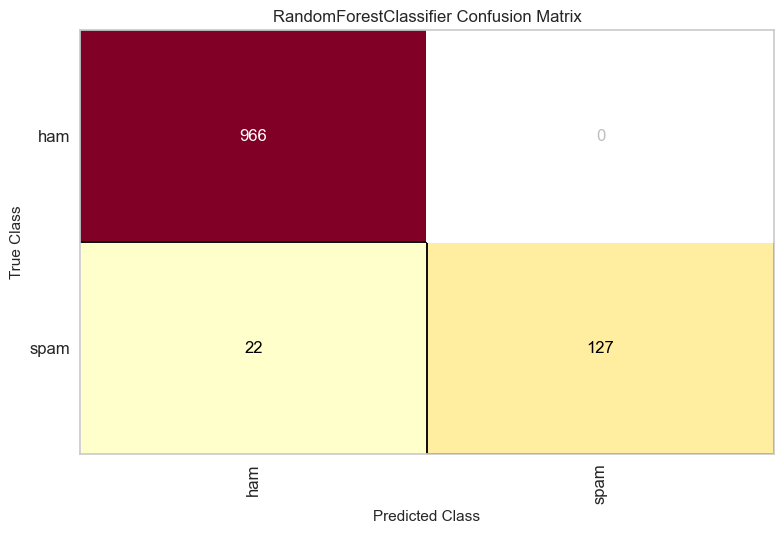

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6]:
# 训练RandomForest分类器
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# 使用Yellowbrick的ConfusionMatrix
rf_visualizer = ConfusionMatrix(rf_clf, classes=["ham", "spam"])
rf_visualizer.score(X_test, y_test)
rf_visualizer.poof(title='Confusion Matrix for Random Forest')
